In [1]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format("channels_last")
from keras.models import model_from_json

In [2]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_final.h5")

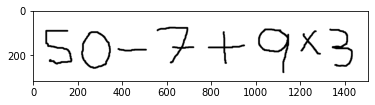

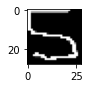

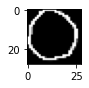

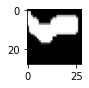

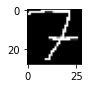

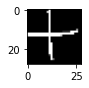

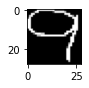

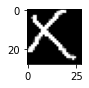

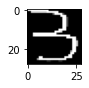

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("C:/Users/Admin/Desktop/eq2.png",cv2.IMREAD_GRAYSCALE)
#cv2.imshow("",img)
plt.imshow(img,cmap='gray')
plt.show()
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i]) 
    final_rect=[i for i in rects if i not in dump_rect]
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        
        im_resize = cv2.resize(im_crop,(28,28))
        plt.figure(figsize = (1,1))
        plt.imshow(im_resize,cmap='gray')
        plt.show()

        im_resize=np.reshape(im_resize,(1,28,28))
        train_data.append(im_resize)

In [4]:
s=''
dic = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'-',11:'+',12:'*'}
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    predict_x=loaded_model.predict(train_data[i]) 
    result=np.argmax(predict_x,axis=1)
    s += dic[result[0]]
    
    
print(s)    

50-7+9*3


In [5]:
eval(s)

70